In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow_p36

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    py-xgboost-0.82            |   py36he1b5a44_0          70 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-0.82            |       he1b5a44_0         3.9 MB  conda-forge
    xgboost-0.82               |   py36he1b5a44_0           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

    _py-xgboost-mutex: 2

In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [8]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# XGBoost Training Parameter Reference: 
#   https://xgboost.readthedocs.io/en/latest/parameter.html
regressor = xgb.XGBRegressor()

In [11]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [12]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:243.815	validation_1-rmse:242.372
[1]	validation_0-rmse:226.378	validation_1-rmse:224.929
[2]	validation_0-rmse:211.106	validation_1-rmse:209.684
[3]	validation_0-rmse:197.644	validation_1-rmse:196.193
[4]	validation_0-rmse:185.756	validation_1-rmse:184.344
[5]	validation_0-rmse:175.618	validation_1-rmse:174.19
[6]	validation_0-rmse:166.621	validation_1-rmse:165.27
[7]	validation_0-rmse:158.84	validation_1-rmse:157.508
[8]	validation_0-rmse:151.785	validation_1-rmse:150.517
[9]	validation_0-rmse:145.08	validation_1-rmse:143.917
[10]	validation_0-rmse:139.532	validation_1-rmse:138.406
[11]	validation_0-rmse:134.086	validation_1-rmse:133.003
[12]	validation_0-rmse:129.498	validation_1-rmse:128.439
[13]	validation_0-rmse:125.85	validation_1-rmse:124.807
[14]	validation_0-rmse:122.338	validation_1-rmse:121.29
[15]	validation_0-rmse:119.698	validation_1-rmse:118.758
[16]	validation_0-rmse:116.597	validation_1-rmse:115.668
[17]	validation_0-rmse:114.318	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [13]:
eval_result = regressor.evals_result()

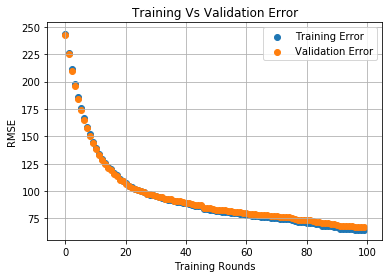

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Training Rounds')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

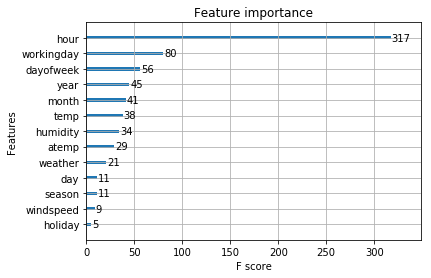

In [15]:
xgb.plot_importance(regressor)

In [16]:
df = pd.read_csv('bike_all.csv')

In [17]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
1,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
3,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
4,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


In [18]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  dayofweek  hour  
0  2011      1    1          5     0  
1  2011      1    1          5     1  
2  2011      1    1          5     2  
3  2011      1    1          5     3  
4  2011      1    1          5     4  


In [19]:
result = regressor.predict(X_test)

In [20]:
result[:5]

array([ 12.027444 ,  -6.3199124, -12.963826 , -20.756227 , -20.756227 ],
      dtype=float32)

In [21]:
df['count_predicted'] = result

In [22]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0,12.027444
1,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1,-6.319912
2,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2,-12.963826
3,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3,-20.756227
4,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4,-20.756227


In [23]:
# Negative Values are predicted
df['count_predicted'].describe()

count    10886.000000
mean       191.664642
std        154.839325
min        -62.244114
25%         44.767494
50%        175.753937
75%        299.150467
max        698.499512
Name: count_predicted, dtype: float64

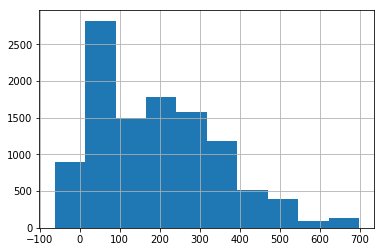

In [25]:
df['count_predicted'].hist()

In [26]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [27]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [32]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0,12.027444
1,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1,0.000000
2,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2,0.000000
3,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3,0.000000
4,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4,0.000000


In [33]:
df['count_predicted'].describe()

count    10886.000000
mean       192.120437
std        154.238795
min          0.000000
25%         44.767494
50%        175.753937
75%        299.150467
max        698.499512
Name: count_predicted, dtype: float64

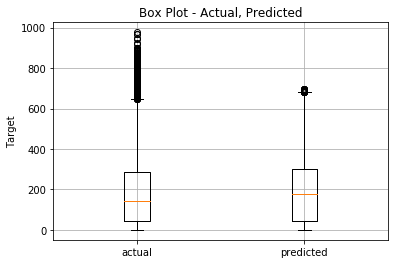

In [28]:
plt.boxplot([df['count'],df['count_predicted']], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

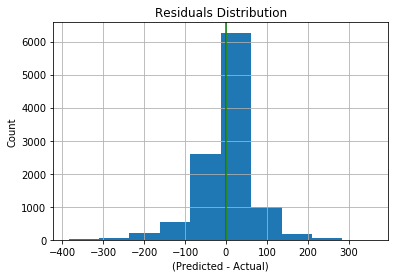

In [34]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count_predicted'] - df['count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')

In [35]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 65.15405869461748


In [50]:
df_test = pd.read_csv(test_file)

In [51]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [52]:
X_test =  df_test.iloc[:, 1:] # skip datetime

In [53]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [54]:
result = regressor.predict(X_test)

In [55]:
result[:5]

array([10.892228  , -0.31041837, -6.9543343 , -7.8215284 , -7.8215284 ],
      dtype=float32)

In [56]:
df_test["count"] = result

In [57]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,10.892228
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-0.310418
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-6.954334
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-7.821528
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-7.821528


In [58]:
df_test["count"] = df_test["count"].map(adjust_count)

In [59]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)